In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt


$\textbf{Source:}$ Professor Mandli GitHub Numerical Methods APMA4300 repository and Walter Gautschi's 'Numerical Analysis'

$$\textbf{Introduction}$$
IVPs for ODEs occur in almost all the sciences, especially in mechanics as all particles are governed by $F = ma$ (a second order ODE).  ODEs are also especially important in calculus of variations, where conditions must satisfy Euler Equations.  

$$\textbf{Descriptions of Single-Step Methods}$$

Given a generic point $ x \in [a,b], ~ \vec{y} \in \mathbb(R)$, we may think of a single step of any one-step method as $\vec{y}_{next} = \vec{y} + h\Phi(x,y; h)~,~~ h>0 ~~~ \Phi$ is a function that can be thought of as the approximate increment per unit step (approximate difference quotient) and defines the single-step methodology.

Say we have the system, then $\vec{u(t)}$ is the true solution and the vector $\vec{y}_{next}$ is intended to approximate $\vec{u}(t+h)$. 

$$\frac{d \vec{u}}{dt} = \vec{f}(t, \vec{u}) $$

$$\textbf{Problem1}$$

Consider the IVP:   $~~~ x''(x) = cos(xt), ~~ x(0) = 1, x'(0) = 0, ~~ 0\leq t \leq 1$

$$\textbf{Part (a)}$$ 

$\textbf{Problem:}$ Reformulate the problem as an IVP for a system of ODEs

$\textbf{Solution:}$ 

$$ \vec u(x) = \begin{bmatrix} x \\ x'\end{bmatrix} = 
\begin{bmatrix} u_1 \\ u_2 \end{bmatrix}$$ 


$$ \frac{d}{dt} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} u_1' \\ x'' \end{bmatrix} = \begin{bmatrix} u_2\\ cos(u_1t) \end{bmatrix}, ~~~ \begin{bmatrix} u_1(0) \\ u_2(0) \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, ~~ ~~ 0\leq t \leq 1$$

$$\textbf{Part (b) }$$ 

$\textbf{Problem:}$ Plot the trajectory

a.  Using Eulers Method

b.  Using Improved Euler 

c.  Using RK4

$\textbf{Solution:}$ 

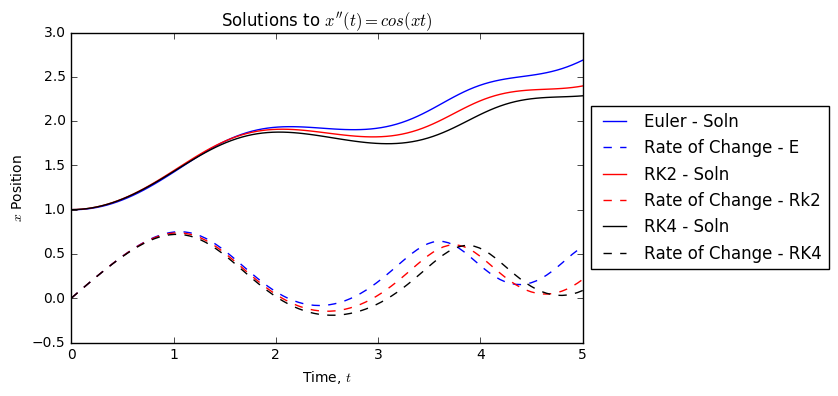

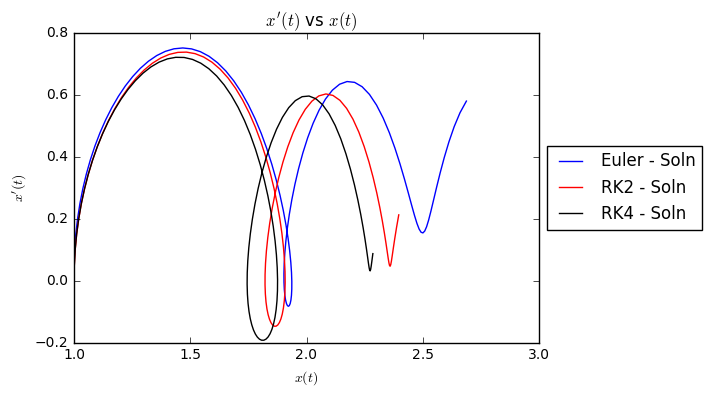

In [62]:
t = numpy.linspace(0, 5, 100)
dt = t[1] - t[0]

# Eulers method
u_e = numpy.empty([2, t.shape[0]])
change_e = numpy.empty([2, t.shape[0]])

# Improved Euler
u_rk2 = numpy.empty([2, t.shape[0]])
change_rk2 = numpy.empty([2, t.shape[0]])

# RK4
u_rk4 = numpy.empty([2, t.shape[0]])
change_rk4 = numpy.empty([2, t.shape[0]])

# Eulers
u_e[0,0] = 1.0
u_e[1, 0] = 0.0

# RK2
u_rk2[0, 0] = 1.0
u_rk2[1, 0] = 0.0

# RK4
u_rk4[0, 0] = 1.0
u_rk4[1, 0] = 0.0

def f(t, u):
    a = u[1]
    b = numpy.cos(u[0] * t)
    return numpy.array([a, b])

# a. Euler's Method
for (ith_TimeIndex, t_ithtime) in enumerate(t[1:]):
    change_e[:, ith_TimeIndex + 1] = f(t_ithtime, u_e[:, ith_TimeIndex])
    u_e[:,ith_TimeIndex + 1] = u_e[:, ith_TimeIndex] + dt * f(t_ithtime, u_e[:, ith_TimeIndex])


# b. RK2
for (ith_TimeIndex, t_ithtime) in enumerate(t[1:]):
    change_rk2[:, ith_TimeIndex + 1] = f(t_ithtime, u_rk2[:, ith_TimeIndex])
    u_rk2[:, ith_TimeIndex+1] = u_rk2[:, ith_TimeIndex] + 0.5 * dt * f(t_ithtime, u_rk2[:, ith_TimeIndex])
    u_rk2[:, ith_TimeIndex+1] = u_rk2[:, ith_TimeIndex] + dt * f(t_ithtime, u_rk2[:,ith_TimeIndex+1])

# c. RK4 Solution
for (ith_TimeIndex, t_ithtime) in enumerate(t[1:]):
    k1 = u_rk4[:, ith_TimeIndex]
    k2 = u_rk4[:, ith_TimeIndex] + .5 * dt * f(t_ithtime + .5 *dt, k1)
    k3 = u_rk4[:, ith_TimeIndex] + .5*dt*f(t_ithtime + 0.5, k2)
    k4 = u_rk4[:, ith_TimeIndex] + dt*f(t_ithtime + dt*0.5, k3)
    u_rk4[:, ith_TimeIndex+1] = u_rk4[:, ith_TimeIndex] + (dt/6.0) * \
      ( f(t_ithtime, k1) + 2.0*f(t_ithtime + 0.5 * dt, k2) + 2.0 * f(t_ithtime + 0.5 * dt, k3) + f(t_ithtime + dt, k4) )
    
    

fig = plt.figure()
axes = fig.add_subplot(1,1,1)
fig.set_figwidth(fig.get_figwidth() * 1.1)

# Eulers Method 
axes.plot(t, u_e[0, :], 'b', label = "Euler - Soln")
axes.plot(t, u_e[1,:], 'b--', label = "Rate of Change - E")

# RK2
axes.plot(t, u_rk2[0, :], 'r', label = "RK2 - Soln")
axes.plot(t, u_rk2[1,:], 'r--', label = "Rate of Change - Rk2")

# RK4
axes.plot(t, u_rk4[0, :], 'k', label = "RK4 - Soln")
axes.plot(t, u_rk4[1,:], 'k--', label = "Rate of Change - RK4")


axes.set_xlabel("Time, $t$")
axes.set_ylabel("$x$ Position")
axes.set_title("Solutions to $x''(t) = cos(xt)$")
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plotting of dx/dt vs x(t)
fig = plt.figure()
axes = fig.add_subplot(1,1,1)

# Eulers Solution 
axes.plot(u_e[0, :], u_e[1,:], 'b', label = "Euler - Soln")

# RK2
axes.plot(u_rk2[0, :], u_rk2[1,:], 'r', label = "RK2 - Soln")

# Rk4 
axes.plot(u_rk4[0, :], u_rk4[1,:], 'k', label = "RK4 - Soln")

axes.set_xlabel("$x(t)$")
axes.set_ylabel("$x'(t)$")
axes.set_title("  $x'(t)$ vs $x(t)$")
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


### Problem 2

#### Source: 
Sprott, Julien Clinton. "Elegant Chaos: Algebraically Simple Chaotic Flows." World Scientific

Lets find a solution to another oscillator IVP ODE problem just like in the notes (see solution to Van der Pol Oscillator). It is called a Rayleigh Oscillator and is closely related to the Rayleigh differential equation.  The main difference is that the $x^2$ term  is replaced with a $\dot{x}^2$ term.  

Each system has the property that the origin is an unstable equilibrium point and trajectories near it spiral outward until either the $x^2$ or $\dot{x}^2$ get too large and are offset by damping.  

Here is an elegant version of a forced Rayleigh Oscillator with a chaotic solution:
$$ \ddot{x} + (\dot{x}^2-4)\dot{x} + x = 5 sin(4t) ~~~ \text{IC:}~~~ (x_0, v_0, t_0) = (-0.9, 4, 0)$$

#### The problem
1. Reformulate this problem as a an IVP for a system of ODEs. 

2. Solve this problem now using a 4 Step Adams-Bash using RK2 to start the method.


$$\mathbf{u} = \begin{bmatrix} x \\ x' \end{bmatrix} = \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} ~, ~~ \frac{d}{dt} \mathbf{u} = \begin{bmatrix} u_1' \\ u_2' \end{bmatrix} =  \begin{bmatrix} x' \\ x'' \end{bmatrix}$$

$$ \frac{d \mathbf{u}}{dt} =  \begin{bmatrix} u_2 \\ u_2' \end{bmatrix} = \begin{bmatrix} u_2 \\- (u_2^2 -4)u_2 - u_1 + 5sin(4t) \end{bmatrix} = f(t, \mathbf{u})$$

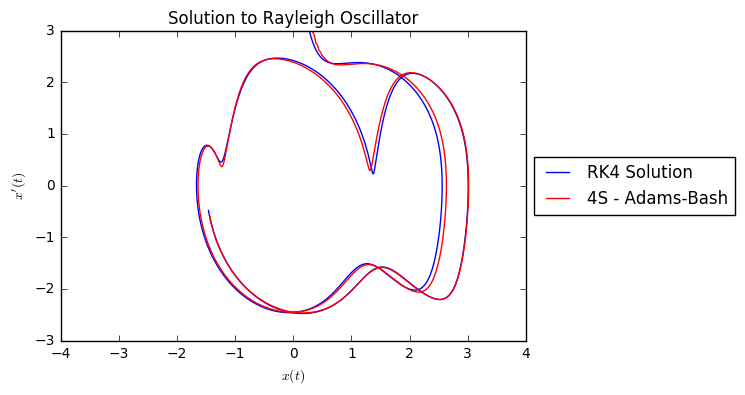

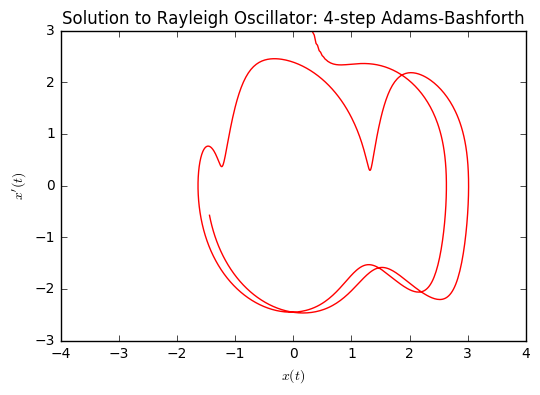

In [27]:
def f(t, u):
    a = u[1]
    b = #5.0*numpy.sin(4.0 * t) - (u[1]**2 - 4)*u[1] - u[0]
    b = - (u[1]**2 - 4)*u[1] - u[0]
    return numpy.array([a, b])

n = 1000
t = numpy.linspace(0, 10, n)
dt = t[1] - t[0]
IC = numpy.array([-0.9, 4.0]) # initial condition (time = 0)
#===============================================================================================
# Adams-Bashforth Solution

# use RK2 to get started
u_ab4 = numpy.empty((2, t.shape[0]))
u_ab4[:, 0] = IC

# first step
u_ab4[:, 1] = u_ab4[:, 0] + 0.5 * dt * f(t[0], u_ab4[:,0])
u_ab4[:, 1] = u_ab4[:, 0] + dt * f(t[0], u_ab4[:, 1])

# second step
u_ab4[:, 2] = u_ab4[:, 1] + 0.5 * dt * f(t[1], u_ab4[:,1])
u_ab4[:, 2] = u_ab4[:, 1] + dt * f(t[1], u_ab4[:, 2])

# third step
u_ab4[:, 3] = u_ab4[:, 2] + 0.5 * dt * f(t[2], u_ab4[:,2])
u_ab4[:, 3] = u_ab4[:, 2] + dt * f(t[2], u_ab4[:, 3])


# Because we have calulcated the first three steps, we iterate up to len(t) - 4 
for n in xrange(0,len(t)-4):
    u_ab4[:, n+4] = u_ab4[:, n + 3] + dt / 24.0 * \
    ( -9.0*f(t[n], u_ab4[:, n]) + 37.0 * f(t[n+1], u_ab4[:, n+1]) \
     -59.0 * f(t[n+1], u_ab4[:, n+2]) + 55.0 * f(t[n+1], u_ab4[:, n+3]) )
#===========================================================================================

#==========================================================================================================
# RK4 Solution
u_rk4 = numpy.empty((2, t.shape[0]))
u_rk4[:, 0] = IC

#RK4 Solution
for (ith_TimeIndex, t_ithtime) in enumerate(t[1:]):
    k1 = u_rk4[:, ith_TimeIndex]
    k2 = u_rk4[:, ith_TimeIndex] + .5 * dt * f(t_ithtime + .5 *dt, k1)
    k3 = u_rk4[:, ith_TimeIndex] + .5*dt*f(t_ithtime + 0.5, k2)
    k4 = u_rk4[:, ith_TimeIndex] + dt*f(t_ithtime + dt*0.5, k3)
    u_rk4[:, ith_TimeIndex+1] = u_rk4[:, ith_TimeIndex] + (dt/6.0) * \
      ( f(t_ithtime, k1) + 2.0*f(t_ithtime + 0.5 * dt, k2) + 2.0 * f(t_ithtime + 0.5 * dt, k3) + f(t_ithtime + dt, k4) )
#==========================================================================================================

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot( u_rk4[0,:], u_rk4[1,:], 'b', label = "RK4 Solution")
axes.plot( u_ab4[0,:], u_ab4[1,:], 'r', label = "4S - Adams-Bash")

axes.set_title("Solution to Rayleigh Oscillator")
axes.set_xlim(-4, 4)
axes.set_ylim(-3, 3)
axes.set_xlabel("$x(t)$")
axes.set_ylabel("$x'(t)$")
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot( u_ab4[0,:], u_ab4[1,:], 'r')
axes.set_xlim(-4, 4)
axes.set_ylim(-3, 3)
axes.set_xlabel("$x(t)$")
axes.set_ylabel("$x'(t)$")
axes.set_title("Solution to Rayleigh Oscillator: 4-step Adams-Bashforth")






plt.show()


### Problem 3

In this problem, we'll numerically solve a system of ODEs in two-dimensional state space that exhibits a kind of chaotic behavior, in apparent violation of the Poincaré-Bendixson theorem. 

#### Poincaré-Bendixson Thm. 
The attractor for any smooth two-dimensional bounded continuous-time autonomous system is either a stable equilibrium or a limit cycle. 

The sysytem we'll look at is: 

$$ \frac{dx}{dt} = \frac{xy}{x^2 + y^2} - \alpha x ~, ~~~ \frac{dy}{dt} = \frac{y^2}{x^2 + y^2} - \beta y + \beta -1 $$

Where alpha and beta can take any real value.

Notice, we have a singularity at the origin and thus we do not satisfy the smoothness condiiton required for the Poincaré-Bendixson Thm.  All orbits are attracted to the singularity in finite time and are sensitive to small perturbations.  

1.  Formulate the system 
$\frac{d}{dt}\mathbf{u} = f(t, \mathbf{u})$ where $\mathbf{u} = \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} $

2.  Solve the system numerically use a 3-step Adams Moulton Scheme as a corrector, using RK2 to begin the method, and using three step Adams-Bashforth method to predict the value of $U_{n+1}$.

Our initial condiiton $(x_0, y_0) = (1, 0)$ and $\alpha = 0 ~~, ~~ \beta = 0.7$


Adams-Bashforth 3 step:  $$U_{n+3} = U_{n+2} + \Delta t / 12 (5 f(U_n) - 16 f(U_{n+1}) + 23 f(U_{n+2}))$$

Adams-Moulton 3 step: $$U_{n+3} = U_{n+2} + \Delta t / 24 (f(U_n) - 5f(U_{n+1}) + 19f(U_{n+2}) + 9f(U_{n+3}))$$


##### Solution to 1

$$ \mathbf{u} = \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} x \\ y \end{bmatrix} \Rightarrow 
\frac{d}{dt}\mathbf{u} = \frac{d}{dt}\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} \dot{x} \\ \dot{y} \end{bmatrix} = \begin{bmatrix} \frac{xy}{x^2 + y^2} - \alpha x \\ \frac{y^2}{x^2 + y^2} - \beta y + \beta -1 \end{bmatrix} = \begin{bmatrix} \frac{u_1 u_2}{u_1^2 + u_2^2} - \alpha u_1 \\ \frac{u_2^2}{u_1^2 + u_2^2} - \beta u_2 + \beta -1 \end{bmatrix} = f(t, \mathbf{u})$$

##### Solution to 2 

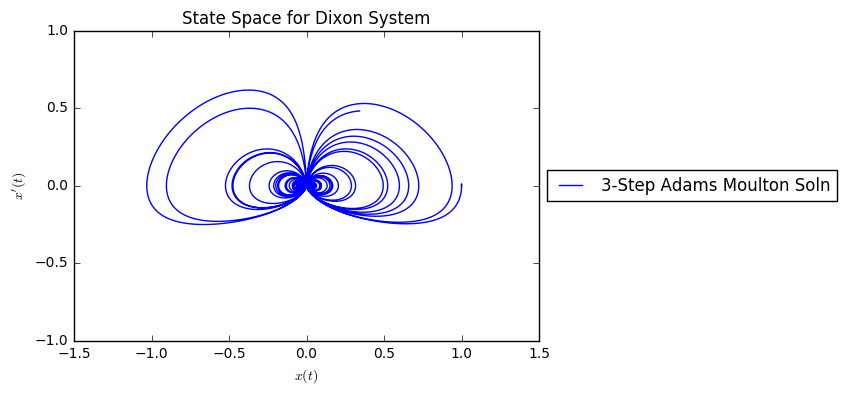

In [40]:
def f(t, u, alpha = 0, beta = 0.7):
    denom = 1.0 / (u[0]**2 + u[1]**2)
    
    a = denom*u[0]*u[1] - alpha * u[0]
    b = denom * (u[1]**2) - beta * u[1] + beta - 1.0
    return numpy.array([a, b])

n = 10000
t = numpy.linspace(0, 100, n)
dt = t[1] - t[0]

# initial condition
IC = numpy.array([1, 0])

u_abm2 = numpy.empty((2, t.shape[0]))
u_abm2[:, 0] = IC
#=============================================================================================
#1.  Use RK2 to get the first two steps 

# first step
u_abm2[:,1] = u_abm2[:,0] + 0.5 * dt * f(t, u_abm2[0])
u_abm2[:,1] = u_abm2[:,0] + dt * f(t, u_abm2[1])

# second step
u_abm2[:, 2] = u_abm2[:,1] + 0.5 * dt * f(t, u_abm2[:,1])
u_abm2[:, 2] = u_abm2[:,1] + dt * f(t, u_abm2[:,2])

for n in xrange(len(t) - 3):
    
    # first, use 3-step Adams Bashforth to get U_{n+3}
    u_abm2[:, n+3] = u_abm2[:, n+2] + (dt/12.0) *\
    ( 5.0 * f(t[n], u_abm2[:, n]) - 16.0 *f(t[n], u_abm2[:,n+1]) + 23.0 * f(t[n], u_abm2[:,n+2]))
    
    # second, we use 3-Step Adams-Moulton to correct
    u_abm2[:, n+3] = u_abm2[:, n+2] + (dt/24.0) *\
    ( f(t[n], u_abm2[:, n]) - 5.0 *f(t[n], u_abm2[:,n+1]) + 19.0 * f(t[n], u_abm2[:,n+2]) + \
    9.0 * f(t[n], u_abm2[:, n+3]) )
#=============================================================================================

# Plotting 
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot( u_abm2[0,:], u_abm2[1,:], 'b', label = "3-Step Adams Moulton Soln")

axes.set_title("State Space for Dixon System")
axes.set_xlim(-1.5, 1.5)
axes.set_ylim(-1, 1)
axes.set_xlabel("$x(t)$")
axes.set_ylabel("$x'(t)$")
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()